In [1]:
import os
import resource
import psutil


In [2]:
!pip install tensorflow

  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-1-py2.py3-none-macosx_11_0_arm64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-5.29.4-cp38-abi3-macosx_10_9_universal2.whl.metadata (592 bytes)
  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.9.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
  Using cached Markdown-3.7-py3-none-any.whl.metadata (7.0 kB)
  Using cached tensorboard_data_server-0.7.2-py3-none-any.whl.metadata (1.1 kB)
  Using cached werkzeug-3.1.3-py3-none-any.whl.metadata (3.7 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.5/252.5 MB 34.6 MB/s eta 

In [3]:
import tensorflow as tf
import torch
import psutil
from transformers import GPT2LMHeadModel, GPT2Tokenizer
#from transformers import T5Tokenizer, T5ForConditionalGeneration
#from transformers import BartTokenizer, BartForConditionalGeneration
from transformers import AutoModelForCausalLM, AutoTokenizer
import time
import matplotlib.pyplot as plt

# for mac OS
tf.config.set_visible_devices([], 'GPU')



os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices=false'


print("Available devices:", tf.config.list_physical_devices())


print("CPU Count:", os.cpu_count())

/opt/miniconda3/envs/swift/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Available devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
CPU Count: 14


In [8]:
!pip uninstall torch torchvision
!pip install torch==2.1.0 torchvision==0.16.0  # or another matching pair

Found existing installation: torch 2.6.0
Uninstalling torch-2.6.0:
  Would remove:
    /opt/miniconda3/bin/torchfrtrace
    /opt/miniconda3/bin/torchrun
    /opt/miniconda3/lib/python3.12/site-packages/functorch/*
    /opt/miniconda3/lib/python3.12/site-packages/torch-2.6.0.dist-info/*
    /opt/miniconda3/lib/python3.12/site-packages/torch/*
    /opt/miniconda3/lib/python3.12/site-packages/torchgen/*
Proceed (Y/n)? ^C
ERROR: Could not find a version that satisfies the requirement torch==2.1.0 (from versions: 2.2.0, 2.2.1, 2.2.2, 2.3.0, 2.3.1, 2.4.0, 2.4.1, 2.5.0, 2.5.1, 2.6.0)
ERROR: No matching distribution found for torch==2.1.0


In [4]:
def limit_virtual_memory(max_mb):
    soft, hard = resource.getrlimit(resource.RLIMIT_AS)
    resource.setrlimit(resource.RLIMIT_AS, (max_mb * 1024 * 1024, hard))



print("Physical GPU Devices:", tf.config.list_physical_devices('GPU'))

print("Logical GPU Devices:", tf.config.list_logical_devices('GPU'))

Physical GPU Devices: []
Logical GPU Devices: []


In [8]:
#model_name = "t5-large"  # You can use "gpt2-medium", "gpt2-large", or "gpt2-xl" for larger versions
#tokenizer = T5Tokenizer.from_pretrained("t5-base")
#model = T5ForConditionalGeneration.from_pretrained("t5-base")

model_name = "gpt2-medium"  # You can use "gpt2-medium", "gpt2-large", or "gpt2-xl" for larger versions
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

#model_name = "facebook/bart-large"
#tokenizer = BartTokenizer.from_pretrained(model_name)
#model = BartForConditionalGeneration.from_pretrained(model_name)

# model_name = "microsoft/phi-1"
# tokenizer = AutoTokenizer.from_pretrained(model_name)
# model = AutoModelForCausalLM.from_pretrained(model_name, torch_dtype=torch.float32)#

In [9]:

if tokenizer.pad_token is None:
    tokenizer.pad_token = tokenizer.eos_token  # Set EOS token as the pad_token

model.eval() 


prompt = "What is the capital of Denmark?"


inputs = tokenizer(prompt, return_tensors="pt", padding=True)  # Ensure padding is applied if needed

attention_mask = inputs['attention_mask']

In [10]:
!pip3 install datasets

In [11]:
!pip3 install --upgrade huggingface_hub

  Using cached huggingface_hub-0.29.3-py3-none-any.whl.metadata (13 kB)
Using cached huggingface_hub-0.29.3-py3-none-any.whl (468 kB)
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.29.2
    Uninstalling huggingface-hub-0.29.2:
      Successfully uninstalled huggingface-hub-0.29.2


In [12]:
!pip uninstall datasets huggingface_hub tokenizers -y
!pip install datasets huggingface_hub tokenizers

Found existing installation: datasets 3.3.2
Uninstalling datasets-3.3.2:
  Successfully uninstalled datasets-3.3.2
Found existing installation: huggingface-hub 0.29.3
Uninstalling huggingface-hub-0.29.3:
  Successfully uninstalled huggingface-hub-0.29.3
Found existing installation: tokenizers 0.15.2
Uninstalling tokenizers-0.15.2:
  Successfully uninstalled tokenizers-0.15.2
  Using cached datasets-3.4.1-py3-none-any.whl.metadata (19 kB)
  Using cached huggingface_hub-0.29.3-py3-none-any.whl.metadata (13 kB)
  Using cached tokenizers-0.21.1-cp39-abi3-macosx_11_0_arm64.whl.metadata (6.8 kB)
Using cached datasets-3.4.1-py3-none-any.whl (487 kB)
Using cached huggingface_hub-0.29.3-py3-none-any.whl (468 kB)
Using cached tokenizers-0.21.1-cp39-abi3-macosx_11_0_arm64.whl (2.7 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
transformers 4.37.1 requires tokenizers<

Iteration 1: What is the capital of Denmark? 
  → Model Output: What is the capital of Denmark?

The capital of Denmark is Copenhagen.

What is the capital of Denmark?

The capital of Denmark is Copenhagen.

What is the capital of Denmark?

The capital of Denmark is Copenhagen.

What is the

Iteration 2: What is the capital of Denmark? 
  → Model Output: What is the capital of Denmark?

The capital of Denmark is Copenhagen.

What is the capital of Denmark?

The capital of Denmark is Copenhagen.

What is the capital of Denmark?

The capital of Denmark is Copenhagen.

What is the

Iteration 3: What is the capital of Denmark? 
  → Model Output: What is the capital of Denmark?

The capital of Denmark is Copenhagen.

What is the capital of Denmark?

The capital of Denmark is Copenhagen.

What is the capital of Denmark?

The capital of Denmark is Copenhagen.

What is the

Iteration 4: What is the capital of Denmark? 
  → Model Output: What is the capital of Denmark?

The capital of Denmark i

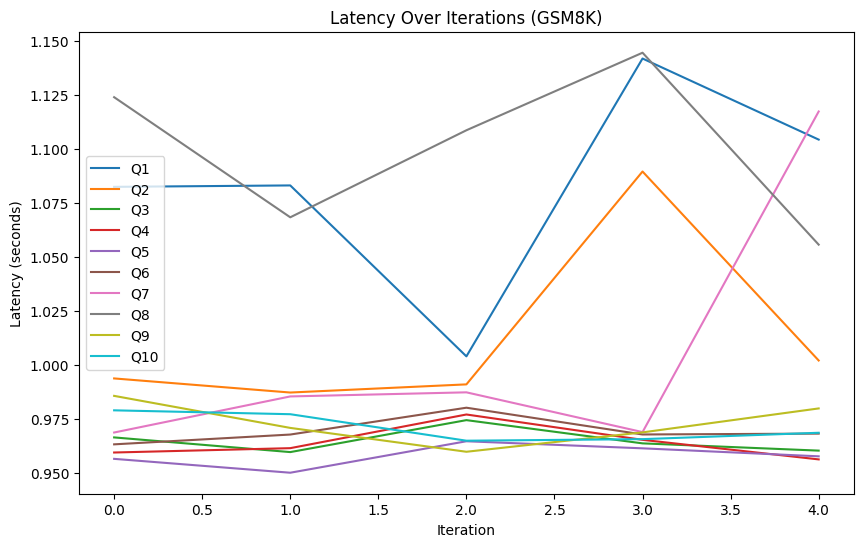

In [13]:
import resource
tf.debugging.set_log_device_placement(True)

def measure_latency(tokenizer, model, prompt, iterations=5):
    latencies = []
    inputs = tokenizer(prompt, return_tensors="pt", padding=True, truncation=True)
    
    for i in range(iterations):
        start_time = time.time()
        with torch.no_grad():
            output_ids = model.generate(
                inputs["input_ids"], 
                attention_mask=inputs["attention_mask"],
                max_new_tokens=50,
                pad_token_id=tokenizer.pad_token_id
            )
        end_time = time.time()
        
        latency = end_time - start_time
        latencies.append(latency)
        output_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)
        
        print(f"Iteration {i+1}: {prompt} \n  → Model Output: {output_text}\n")

    return sum(latencies) / len(latencies), latencies


results = []
for idx in range(10):
    avg_latency, latencies = measure_latency(tokenizer, model, prompt)
    results.append((prompt, avg_latency, latencies))


plt.figure(figsize=(10, 6))
for idx, (_, _, latencies) in enumerate(results):
    plt.plot(latencies, label=f"Q{idx+1}")

plt.title("Latency Over Iterations (GSM8K)")
plt.xlabel("Iteration")
plt.ylabel("Latency (seconds)")
plt.legend()
plt.show()

In [14]:
print(avg_latency)

0.9710188388824463


Average Throughput: 2.24 samples/second


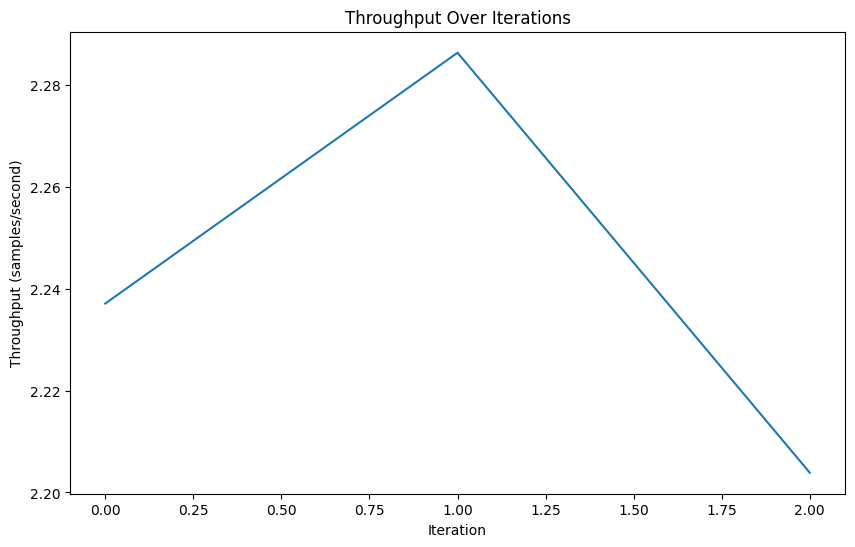

In [15]:


def measure_throughput_gsm(tokenizer, model, questions, batch_size=8, iterations=3):
    throughputs = []
    
    for i in range(iterations):
        batch = questions[i % len(questions): (i % len(questions)) + batch_size]  # Get batch of questions
        inputs = tokenizer(batch, return_tensors="pt", padding=True, truncation=True, return_attention_mask=True)
        attention_mask = inputs['attention_mask']
        
        if tokenizer.pad_token is None:
            tokenizer.pad_token = tokenizer.eos_token

        start_time = time.time()
        model.generate(
            inputs['input_ids'], 
            attention_mask=attention_mask,
            max_new_tokens=50,  # Ensures output length is controlled
            pad_token_id=tokenizer.pad_token_id
        )
        end_time = time.time()
        
        throughput = batch_size / (end_time - start_time)
        throughputs.append(throughput)

    average_throughput = sum(throughputs) / len(throughputs)
    return throughputs, average_throughput


throughputs, average_throughput = measure_throughput_gsm(tokenizer, model, [prompt]*10)

print(f"Average Throughput: {average_throughput:.2f} samples/second")

plt.figure(figsize=(10, 6))
plt.plot(throughputs)
plt.title('Throughput Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Throughput (samples/second)')
plt.show()
